In [16]:
from IPython.display import Markdown

# 位置编码向量与词向量的值作相加
# 而且要保证位置编码向量的值在训练迭代过程中不变
# 位置编码的长度与词向量要一致
# 使用markdown数学格式生成三角函数的 位置编码公式

position_encoding_formula = r"""
$$
PE_{pos,2i} = \sin\left(\frac{pos}{10000^{\frac{2i}{d}}}\right), \quad
PE_{pos,2i+1} = \cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
$$
"""
position_encoding_formula += r"""
$$
PE_{pos} = [PE_{pos,0}, PE_{pos,1}, ..., PE_{pos,d-1}]
$$
"""
Markdown(position_encoding_formula)


$$
PE_{pos,2i} = \sin\left(\frac{pos}{10000^{\frac{2i}{d}}}\right), \quad
PE_{pos,2i+1} = \cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
$$

$$
PE_{pos} = [PE_{pos,0}, PE_{pos,1}, ..., PE_{pos,d-1}]
$$


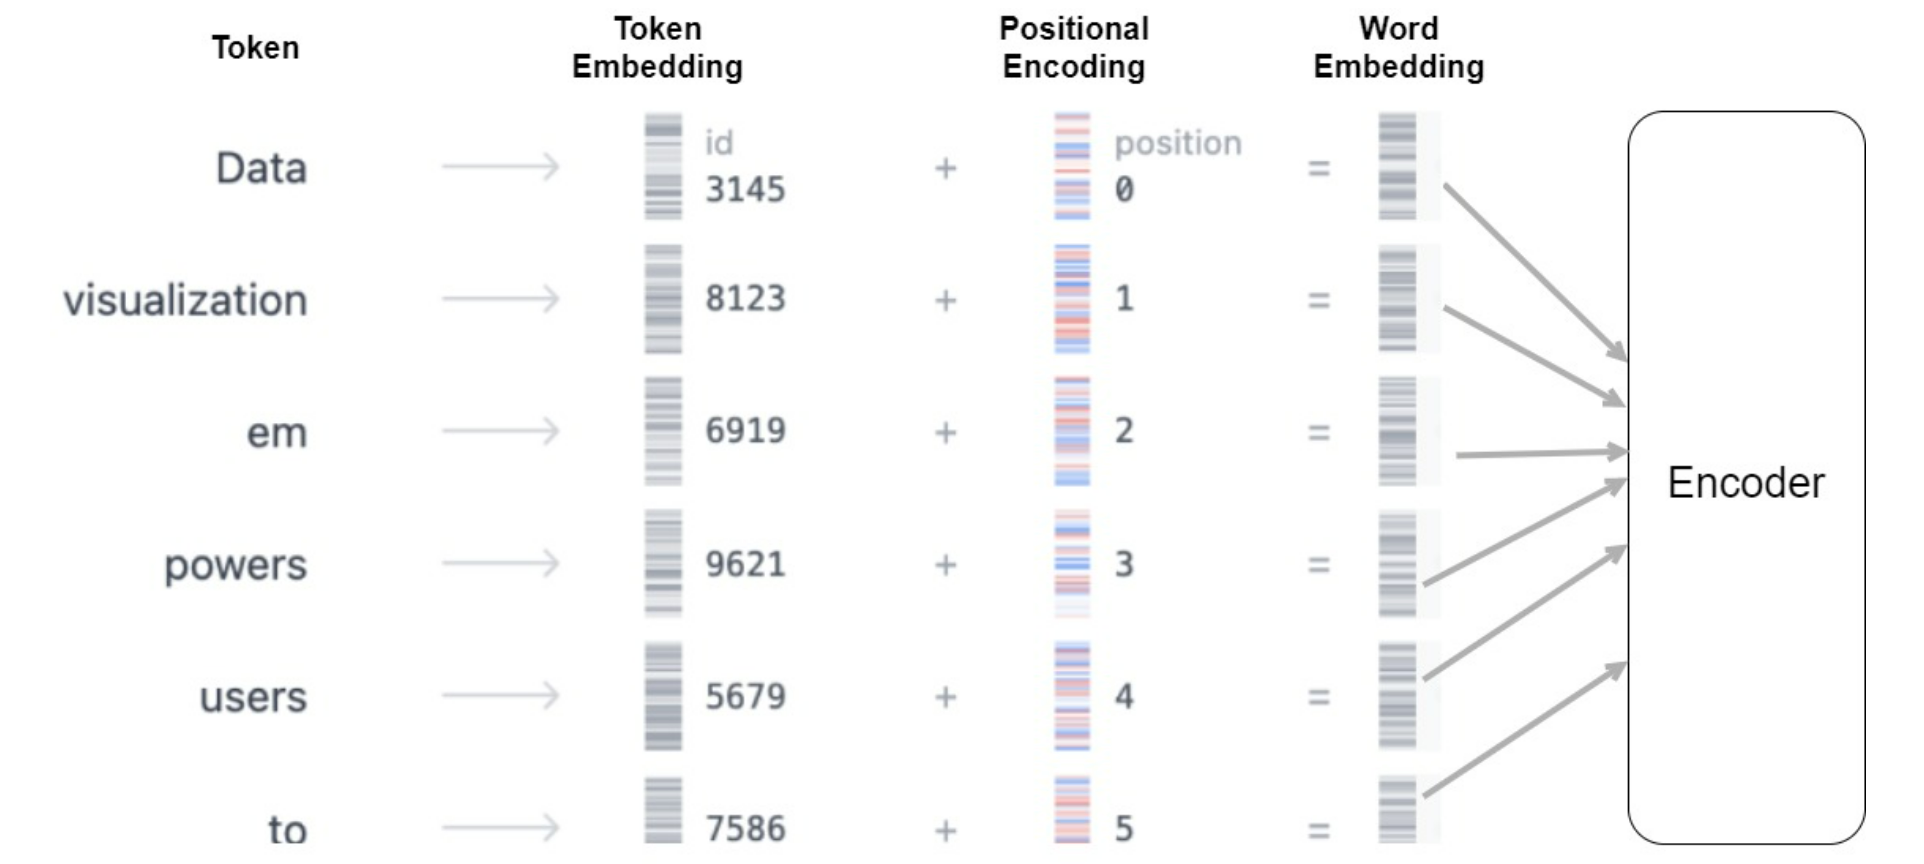

In [17]:
import numpy as np
import matplotlib.pyplot as plt
PE = np.zeros((60,4))
PE

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [18]:
# PE 对应着词向量序列的大小(首先是一个矩阵)经过三角位置编码得到的
def get_PositionEncoding(seq_len, dim, n=10000):
  PE = np.zeros((seq_len, dim))
  for pos in range(seq_len):
    for i in range(int(dim / 2)):  # Cast dim / 2 to an integer
      denominator = np.power(n, 2 * i / dim)
      PE[pos, 2 * i] = np.sin(pos / denominator)
      PE[pos, 2 * i + 1] = np.cos(pos / denominator)
  return PE
PE = get_PositionEncoding(60, 4)
PE[0]
   

array([0., 1., 0., 1.])

In [19]:
PE

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.00999983,  0.99995   ],
       [ 0.90929743, -0.41614684,  0.01999867,  0.99980001],
       [ 0.14112001, -0.9899925 ,  0.0299955 ,  0.99955003],
       [-0.7568025 , -0.65364362,  0.03998933,  0.99920011],
       [-0.95892427,  0.28366219,  0.04997917,  0.99875026],
       [-0.2794155 ,  0.96017029,  0.05996401,  0.99820054],
       [ 0.6569866 ,  0.75390225,  0.06994285,  0.997551  ],
       [ 0.98935825, -0.14550003,  0.07991469,  0.99680171],
       [ 0.41211849, -0.91113026,  0.08987855,  0.99595273],
       [-0.54402111, -0.83907153,  0.09983342,  0.99500417],
       [-0.99999021,  0.0044257 ,  0.1097783 ,  0.9939561 ],
       [-0.53657292,  0.84385396,  0.11971221,  0.99280864],
       [ 0.42016704,  0.90744678,  0.12963414,  0.99156189],
       [ 0.99060736,  0.13673722,  0.13954311,  0.990216  ],
       [ 0.65028784, -0.75968791,  0.14943813,  0.98877108],
       [-0.28790332, -0.

In [20]:
PE[4,]

array([-0.7568025 , -0.65364362,  0.03998933,  0.99920011])

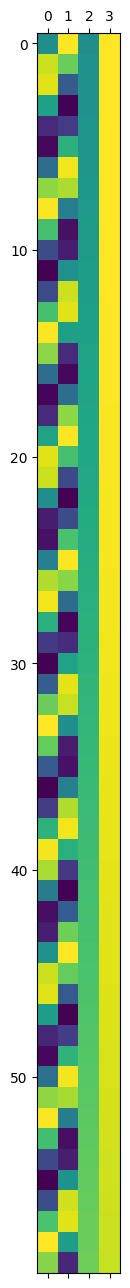

In [21]:
import matplotlib.pyplot as plot
caxes = plot.matshow(PE,interpolation='nearest')

In [22]:
from MutiheadSelfAttention import PositionEncoding,Embeddings

In [23]:
import torch
dimension = 512
vocab = 100
# x 输入一句话 
# 这里的 1,2,3,4 ...10 是一个词索引序列
x = torch.tensor([[1, 2],[4,6]])
EMB = Embeddings(vocab, dimension)
b = EMB(x)
print(b.shape)
print(b)
# batch_size , seq_len, dimension 越往后越行

torch.Size([2, 2, 512])
tensor([[[ 43.2211,  34.1743, -17.3299,  ...,  -2.2752, -15.6415, -28.4063],
         [-35.2357,  -7.4047, -11.0495,  ...,   7.2275,  -5.7749,   3.3760]],

        [[  5.5571,   4.2103,  13.9197,  ...,   8.1883, -34.4056,   7.7847],
         [-12.6243,  17.4376,  -8.0495,  ...,  23.2489, -23.5243,  -8.7652]]],
       grad_fn=<MulBackward0>)


In [24]:
#疑问 Position编码的最大长度 若是输入句子没那么长如何对比
dropout_rate = 0.3
max_len = 100
pe = PositionEncoding(dimension, dropout_rate, max_len)
pe
pe(b)

TypeError: 'require_grad' is an invalid keyword argument for this function